# Logistic Regression 

## import library

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [143]:
fname_data = 'assignment_08_data.csv'

data = np.genfromtxt(fname_data, delimiter=',')
num_data = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):

    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]

## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [144]:
def linear_regression(theta, x, y):
    value = theta[0] + theta[1] * x + theta[2] * y

    return value

## define sigmoid function with input $x$

In [145]:
def sigmoid(theta, x, y):
    z = linear_regression(theta, x, y)
    exp_temp = 1 + np.exp(-z)
    exp = 1 / exp_temp

    return exp

## define loss function for the logistic regression

In [146]:
def compute_loss(theta, x, y, label):
    loss = 0
    for i in range(num_data):
        hi = sigmoid(theta, x[i], y[i])
        a = (-1) * label[i] * np.log(hi)
        b = (-1) * (1 - label[i]) * np.log(1 - hi)
        
        loss_temp = a + b
        loss = loss + loss_temp
        
    loss = loss / num_data
    
    return loss

## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [147]:
def compute_gradient(theta, x, y, label):
    gradient = 0
    for i in range(num_data):
        temp = np.array((1, x[i], y[i]))
        a_diff = label[i] * (sigmoid(theta, x[i], y[i]) - 1)
        b_diff = (1 - label[i]) * sigmoid(theta, x[i], y[i])
        
        gradient_temp = np.multiply(a_diff, temp) + np.multiply(b_diff, temp)
        gradient = gradient + gradient_temp
        
    gradient = gradient / num_data

    return gradient

## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [148]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate
theta           = np.array((0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters

theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration = np.zeros(num_iteration)

## iterations for the gradient descent

In [149]:
for i in range(num_iteration):
    theta = theta - (learning_rate * compute_gradient(theta, point_x, point_y, label))
    loss = compute_loss(theta, point_x, point_y, label)
    
    theta_iteration[i] = theta
    loss_iteration[i] = loss
    

## plot the results

In [150]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')

    index = np.arange(num_iteration)
    plt.plot(index, loss_iteration, '-', color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [151]:
def plot_data(point_x, point_y, label):
    point_x0 = np.zeros(num_data)
    point_x1 = np.zeros(num_data)
    point_y0 = np.zeros(num_data)
    point_y1 = np.zeros(num_data)
    
    for i in range(num_data):
        if label[i] == 0:
            point_x0[i] = point_x[i]
            point_y0[i] = point_y[i]
        else:
            point_x1[i] = point_x[i]
            point_y1[i] = point_y[i]
    
    plt.figure(figsize=(8,8))
    plt.title('training data')

    plt.scatter(point_x0, point_y0, marker = '.', color = 'blue', label = 'class 0')
    plt.scatter(point_x1, point_y1, marker = '.', color = 'red', label = 'class 1')

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [152]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')

    index = np.arange(num_iteration)
    plt.plot(index, theta_iteration[:, 0], '-', color = 'red', label = 'theta 0')
    plt.plot(index, theta_iteration[:, 1], '-', color = 'green', label = 'theta 1')
    plt.plot(index, theta_iteration[:, 2], '-', color = 'blue', label = 'theta 2')

    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [153]:
xx = np.arange(point_x.min() - 1, point_x.max() + 1, 0.01)
yy = np.arange(point_y.min() - 1, point_y.max() + 1, 0.01)

x0, y0 = np.meshgrid(xx, yy)
Z = linear_regression(theta, x0, y0)

def plot_classifier(x0, y0, Z, point_x, point_y, label):
    
    point_x0 = np.zeros(num_data)
    point_y0 = np.zeros(num_data)
    point_x1 = np.zeros(num_data)
    point_y1 = np.zeros(num_data)

    for i in range(num_data):
        if label[i] == 0:
            point_x0[i] = point_x[i]
            point_y0[i] = point_y[i]
        else:
            point_x1[i] = point_x[i]
            point_y1[i] = point_y[i]
            
    f, ax = plt.subplots(figsize = (8, 6))
    
    contour = ax.contourf(x0, y0, Z, levels = 100, cmap = plt.cm.get_cmap('RdBu_r'))
    ax_c = f.colorbar(contour)
    
    ax.scatter(point_x0, point_y0, s = 30, color = 'blue', label = 'class 0', edgecolor="white")
    ax.scatter(point_x1, point_y1, s = 30, color = 'red', label = 'class 1', edgecolor="white")
    
    ax.contour(x0, y0, Z, levels= 1, cmap="Greys", vmax = .6)

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data point in blue for class 0 and in red for class 1

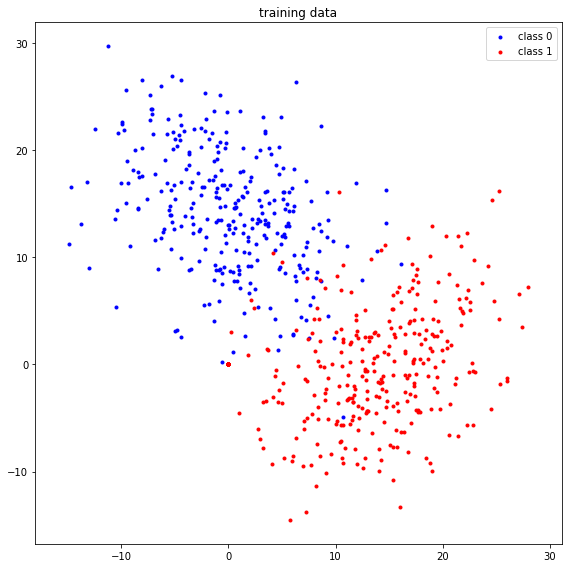

In [154]:
plot_data(point_x, point_y, label)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

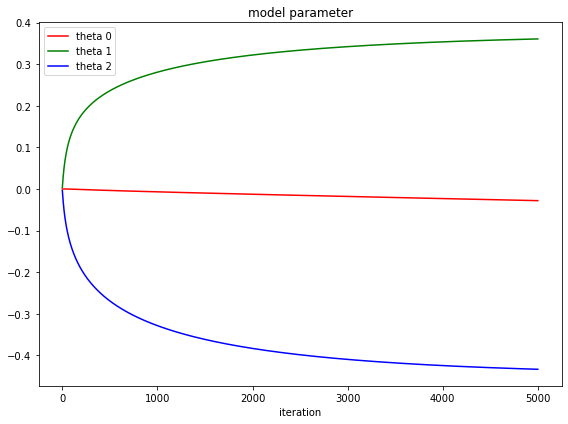

In [155]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

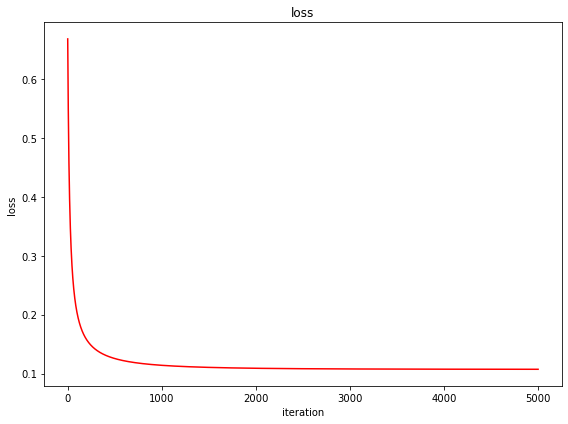

In [156]:
plot_loss_curve(loss_iteration)

### # 04. plot the classifier with the given data points superimposed

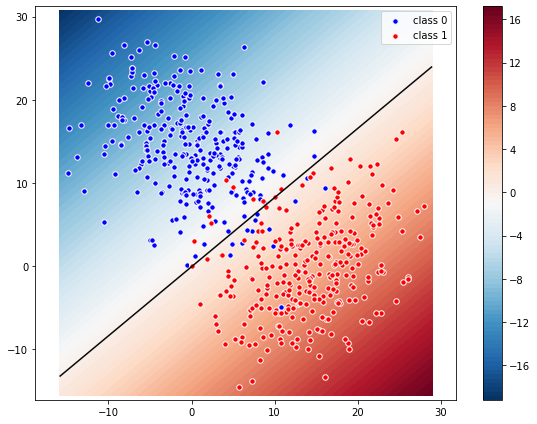

In [157]:
plot_classifier(x0, y0, Z, point_x, point_y, label)